In [8]:
#Je vais cluster par équipes , : x , Nombre de matchs gagnés : y
import pandas as pd
import random
team_home = pd.read_csv('train_home_team_statistics_df.csv')
team_away = pd.read_csv('train_away_team_statistics_df.csv')
team_input = team_home[["ID", "LEAGUE", "TEAM_NAME"]]
#concaténer les deux sans répétition
team = team_away.join(team_home, on = ["ID"], lsuffix=".A", rsuffix=".H")
#supprimer les valeurs manquantes
for c in team.columns:
    print(c)

ID
ID.A
LEAGUE.A
TEAM_NAME.A
TEAM_SHOTS_TOTAL_season_sum.A
TEAM_SHOTS_INSIDEBOX_season_sum.A
TEAM_SHOTS_OFF_TARGET_season_sum.A
TEAM_SHOTS_ON_TARGET_season_sum.A
TEAM_SHOTS_OUTSIDEBOX_season_sum.A
TEAM_PASSES_season_sum.A
TEAM_SUCCESSFUL_PASSES_season_sum.A
TEAM_SAVES_season_sum.A
TEAM_CORNERS_season_sum.A
TEAM_FOULS_season_sum.A
TEAM_YELLOWCARDS_season_sum.A
TEAM_REDCARDS_season_sum.A
TEAM_OFFSIDES_season_sum.A
TEAM_ATTACKS_season_sum.A
TEAM_PENALTIES_season_sum.A
TEAM_SUBSTITUTIONS_season_sum.A
TEAM_BALL_SAFE_season_sum.A
TEAM_DANGEROUS_ATTACKS_season_sum.A
TEAM_INJURIES_season_sum.A
TEAM_GOALS_season_sum.A
TEAM_GAME_WON_season_sum.A
TEAM_GAME_DRAW_season_sum.A
TEAM_GAME_LOST_season_sum.A
TEAM_SHOTS_TOTAL_season_average.A
TEAM_SHOTS_INSIDEBOX_season_average.A
TEAM_SHOTS_OFF_TARGET_season_average.A
TEAM_SHOTS_ON_TARGET_season_average.A
TEAM_SHOTS_OUTSIDEBOX_season_average.A
TEAM_PASSES_season_average.A
TEAM_SUCCESSFUL_PASSES_season_average.A
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_av

In [9]:
# Néttoyage des données

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

# On ne garde que les flotants
X = team.select_dtypes(include=["float64"])
# On retire les ligne avec des NaN
print("len X avant drop na =", len(X))
X.dropna(inplace=True)
print("len X après drop na =", len(X))

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


len X avant drop na = 12303
len X après drop na = 8263


# Clustring 1 : KMeans

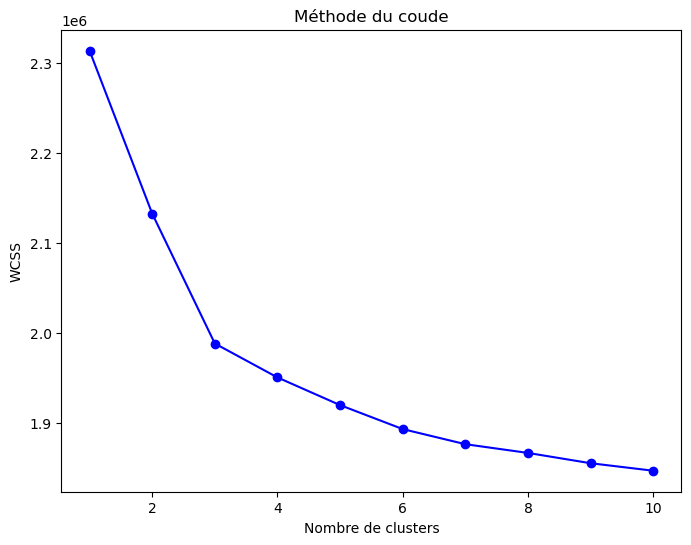

In [10]:
# Methode du coude

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 

# Étape 4 : Tracer la courbe WCSS vs. Nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

# On découvre que le nombre optimal de cluster est 3

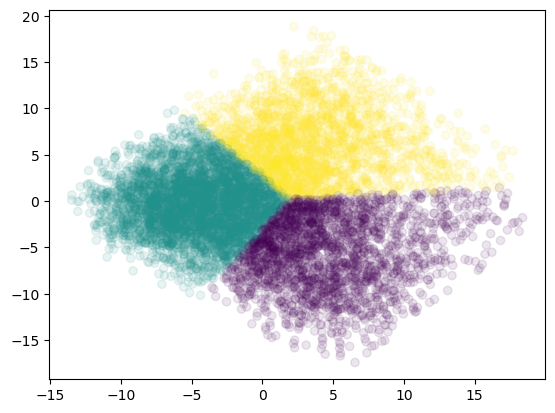

In [11]:
from sklearn.decomposition import PCA

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c = kmeans_model.labels_, cmap="viridis", alpha=0.1)
plt.show()

# Clustering 2 : CAH

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram

cah_model = linkage(X_cleared, method="ward", metric="euclidean")

NameError: name 'X_cleared' is not defined

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [92.5, 92.5, 130.0, 130.0],
  [60.0, 60.0, 111.25, 111.25],
  [13.75, 13.75, 85.625, 85.625],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [171.25, 171.25, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [292.5, 292.5, 322.5, 322.5],
  [260.0, 260.0, 307.5, 307.5],
  [345.0, 345.0, 355.0, 35

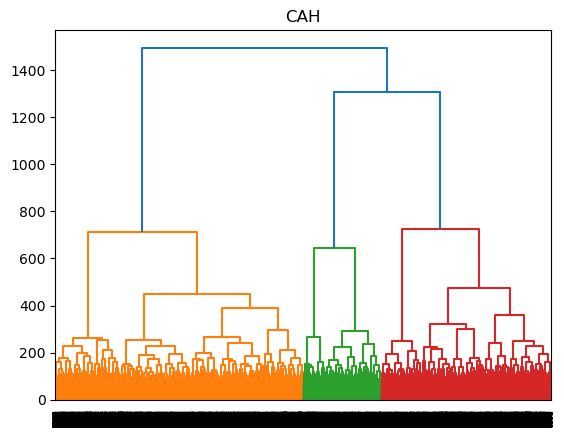

In [ ]:
plt.title("CAH")
dendrogram(cah_model)
plt.show()

In [14]:
Y_train = pd.read_csv("Y_train.csv")
Y_train.dropna(inplace=True)

print(Y_train)

          ID  HOME_WINS  DRAW  AWAY_WINS
0          0          0     0          1
1          1          0     1          0
2          2          0     0          1
3          3          1     0          0
4          4          0     1          0
...      ...        ...   ...        ...
12298  12298          0     0          1
12299  12299          0     0          1
12300  12300          0     0          1
12301  12301          1     0          0
12302  12302          1     0          0

[12303 rows x 4 columns]


In [15]:
from sklearn.tree import DecisionTreeClassifier

#On a 140 features différents , chacun peut avoir une réponse oui ou non avant un intervalle donné
# donc on a besoin 140 * 140 = 19600 (minimum)
# donc hauteur de log2(19600) à peu près 14
team_classifier = DecisionTreeClassifier(criterion="gini")

X = team.select_dtypes(include = ["float64"])
print(len(X.columns))

#Entrainement du modèle
team_classifier.fit_transform(X, Y_train)

280


: 

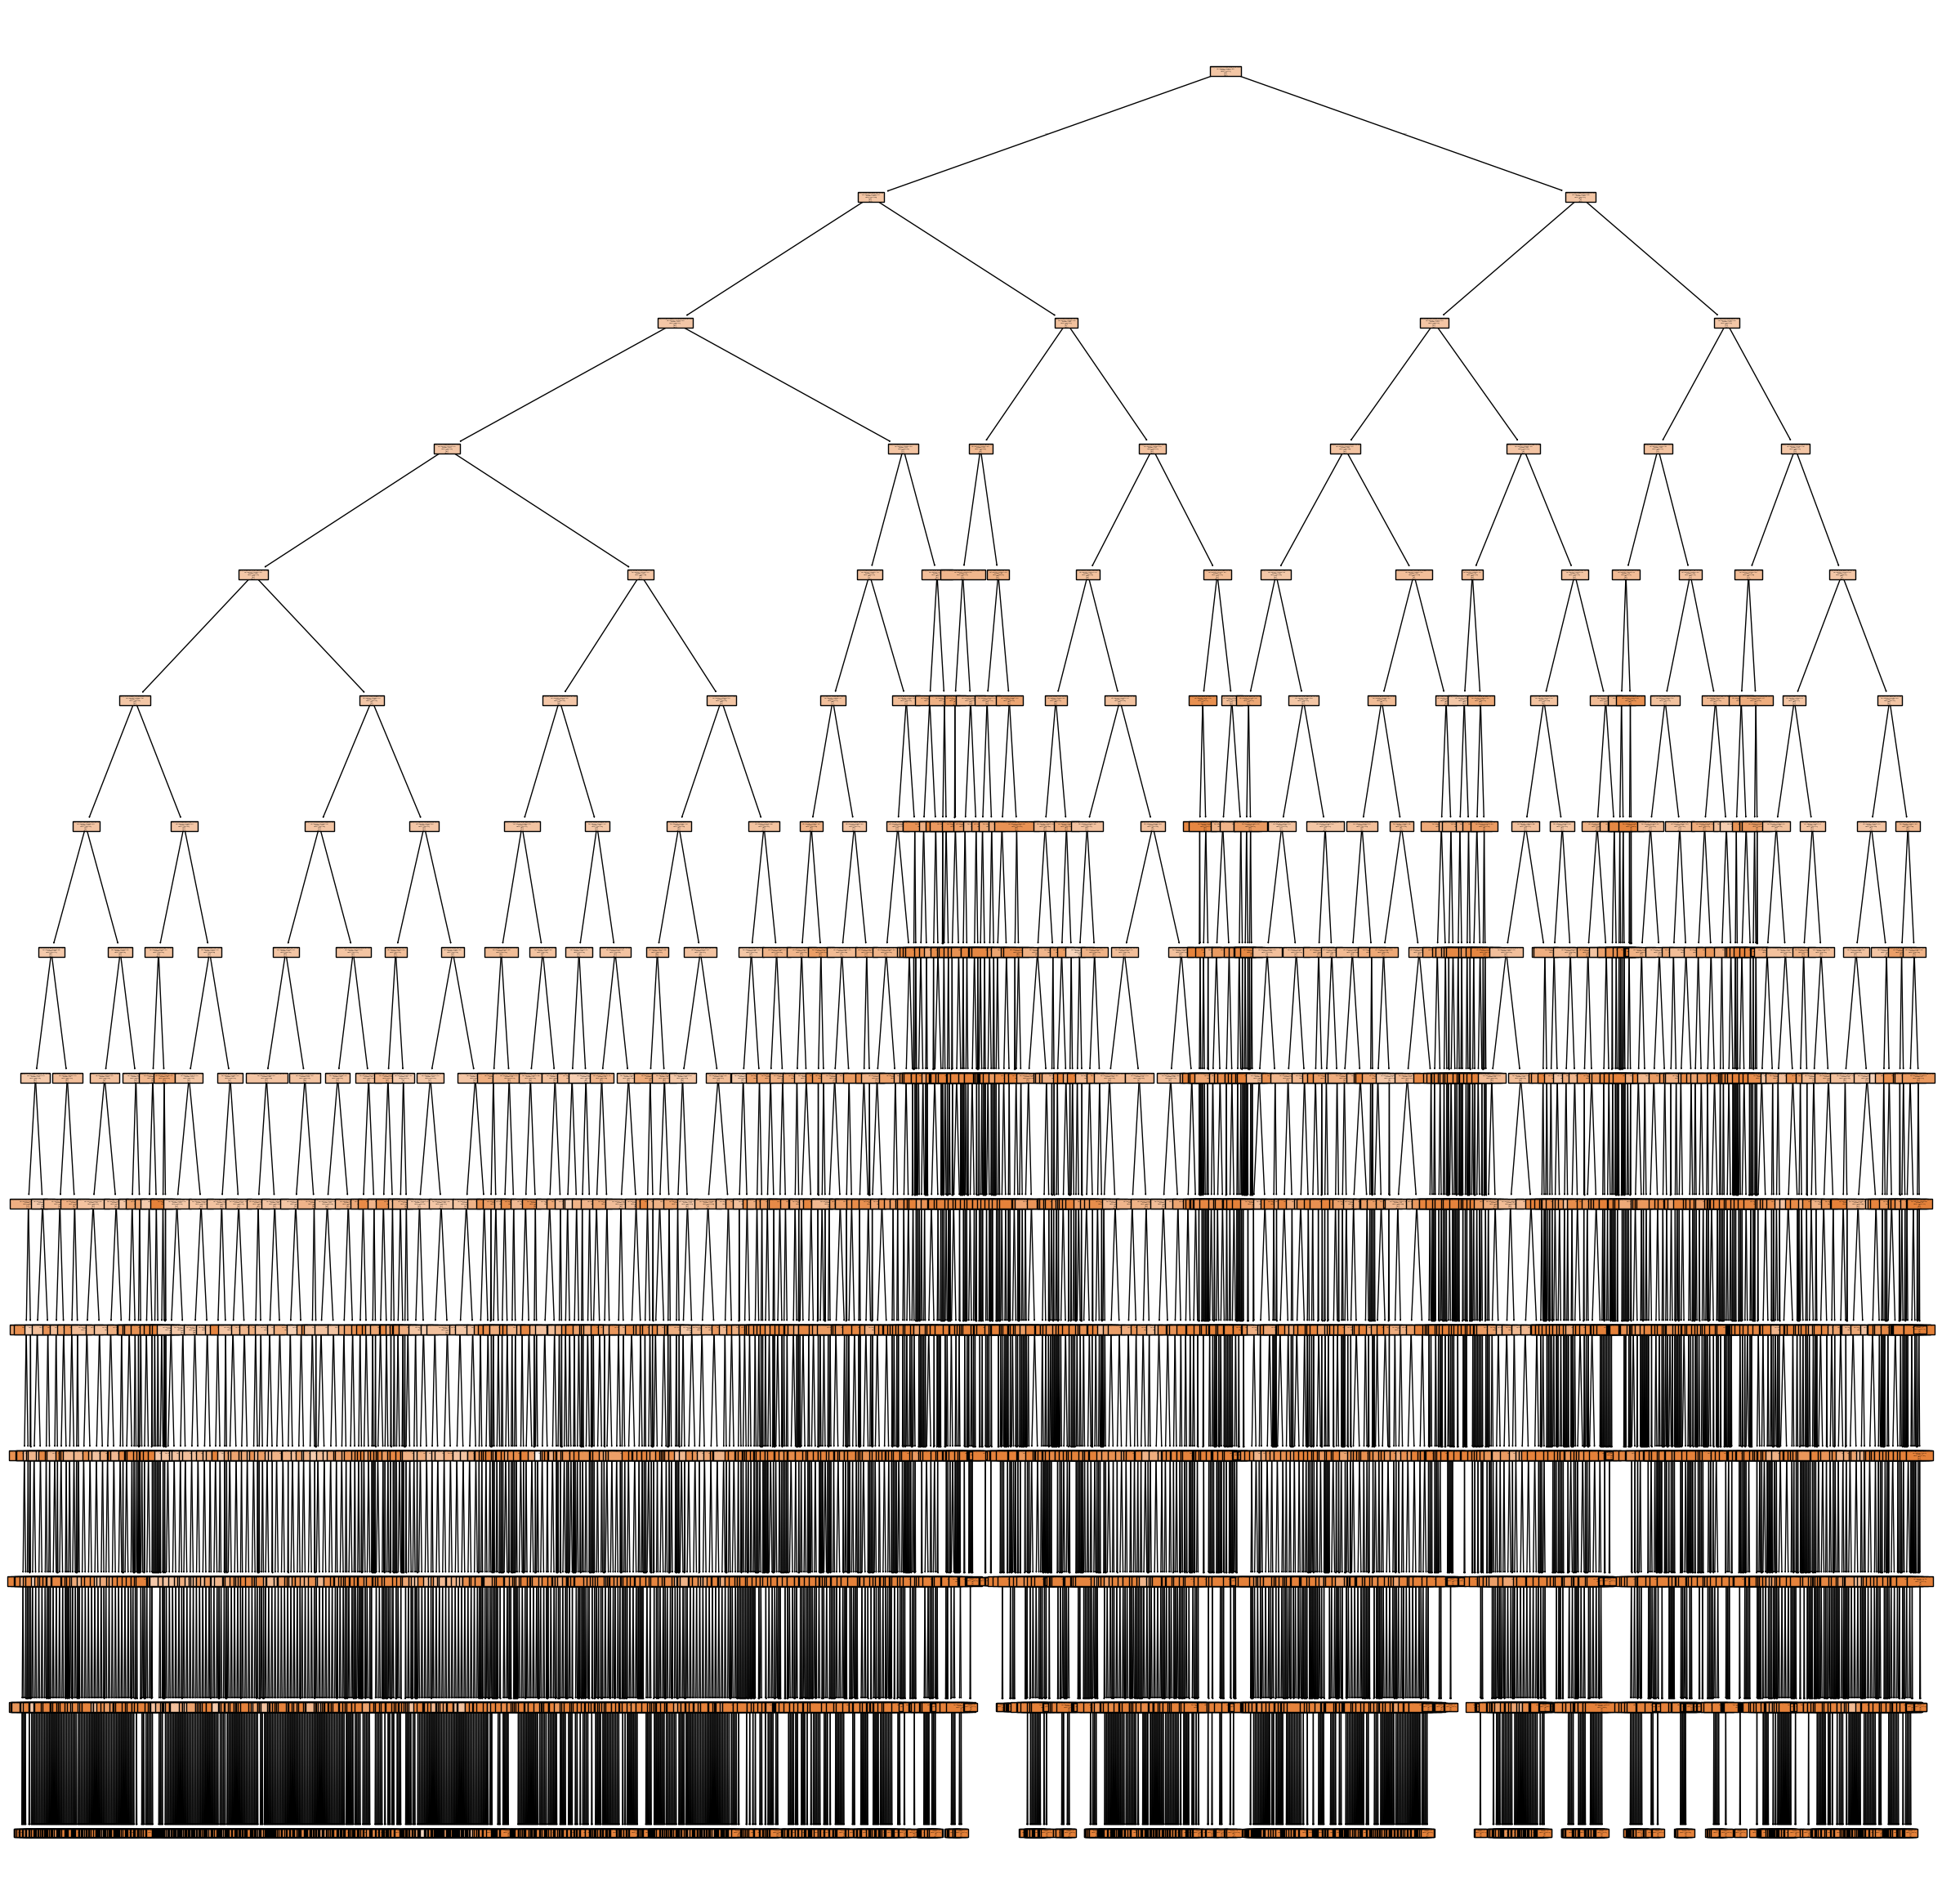

In [158]:
# Plot l'arbre de décision
plt.figure(figsize=(30, 30))
plot_tree(regr_equipes, filled=True, feature_names=X.keys())
plt.show()

ValueError: columns overlap but no suffix specified: Index(['ID'], dtype='object')